In [1]:
import pandas as pd 
import os 

In [ ]:
ds = pd.read_csv('en_climate_hourly_ON_6155875_01-2023_P1H.csv')

In [3]:
ds.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (UTC),Year,Month,Day,Time (UTC),Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-78.88,43.92,OSHAWA,6155875,2023-01-01 00:00,2023,1,1,00:00,NaN,...,NaN,16.1,NaN,99.05,NaN,NaN,NaN,NaN,NaN,Rain
1,-78.88,43.92,OSHAWA,6155875,2023-01-01 01:00,2023,1,1,01:00,NaN,...,NaN,16.1,NaN,99.12,NaN,NaN,NaN,NaN,NaN,NaN
2,-78.88,43.92,OSHAWA,6155875,2023-01-01 02:00,2023,1,1,02:00,NaN,...,NaN,16.1,NaN,99.15,NaN,NaN,NaN,NaN,NaN,NaN
3,-78.88,43.92,OSHAWA,6155875,2023-01-01 03:00,2023,1,1,03:00,NaN,...,NaN,16.1,NaN,99.20,NaN,NaN,NaN,NaN,NaN,NaN
4,-78.88,43.92,OSHAWA,6155875,2023-01-01 04:00,2023,1,1,04:00,NaN,...,NaN,16.1,NaN,99.31,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns_to_keep = ["Year", "Month", "Day", "Time (UTC)", "Temp (°C)"]

In [10]:
cleaned_ds = []

In [11]:
folder_path = r'C:\Users\Dragos\OneDrive\Documents\weather_predictor_app\timedata'

In [ ]:
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        ds = pd.read_csv(file_path)
        
        ds_cleaned = ds[columns_to_keep]
        cleaned_ds.append(ds_cleaned)

combined_ds = pd.concat(cleaned_ds, ignore_index=True)


combined_ds.to_csv(os.path.join(folder_path, "timedata.csv"), index=False)

In [27]:
data = pd.read_csv('timedata.csv')

In [28]:
data.count()

Year          35064
Month         35064
Day           35064
Time (UTC)    35064
Temp (°C)     35064
dtype: int64

In [29]:
data.duplicated().sum()

0

In [30]:
rows_with_missing_values = data[data.isnull().any(axis=1)]

# Print the rows with missing values
print(rows_with_missing_values)

Empty DataFrame
Columns: [Year, Month, Day, Time (UTC), Temp (°C)]
Index: []


<Axes: xlabel='Time (UTC)'>

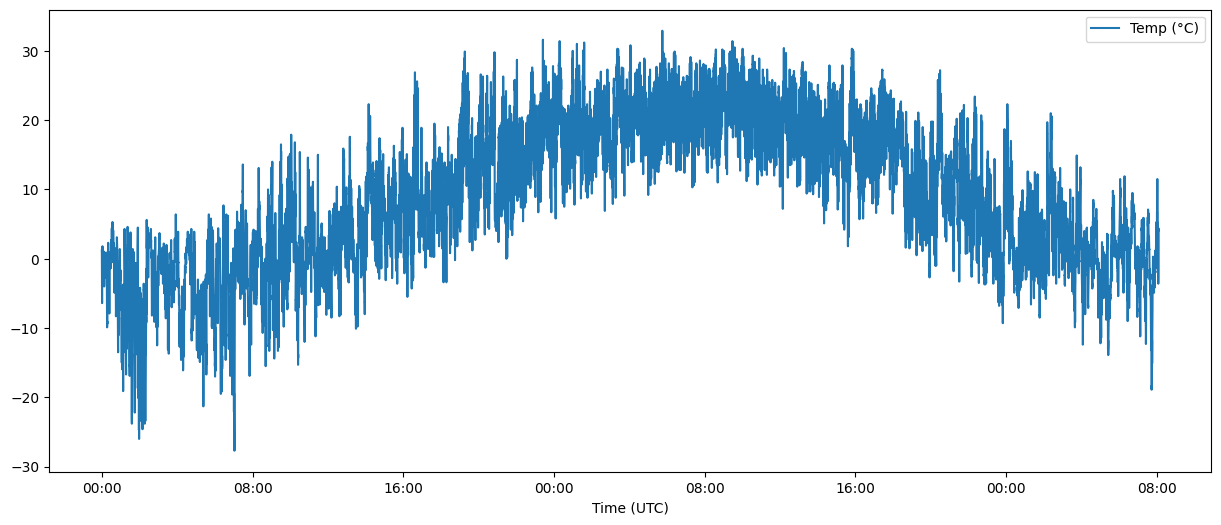

In [31]:
data.plot(x='Time (UTC)', y='Temp (°C)', figsize=(15, 6))